In [1]:
### uncomment to display figures
%matplotlib inline

# Demonstrates benchmarking functionality - wunsat - AMSRE

#### Benchmarking dataset information
The soil moisture content (in percentage) dataset consists of catchment averaged top-layer soil moisture estimates from AMSR-E
<br>
##### Source:
Owe, M., de Jeu, R. and Holmes, T., 2008. Multisensor historical climatology of satellite-derived global land surface moisture. Journal of Geophysical Research: Earth Surface, 113(F1): F01002.

This notebooks goes through the following steps:

1. Import required libraries
2. Set up benchmarking configuration <br>
 2.1 Catchments to be benchmarked<br>
 2.2 Define observation inputs<br>

3. Create benchmark object<br>
4. Add models to be benchmarked <br>
 4.1 Select or unselect models<br> 
5. View benchmarking statistics<br>
6. View benchmarking plots<br>
7. Statistics plotting
8. Exercises

### 1. Import required libraries

In [16]:
from awrams.benchmarking.benchmark import Benchmark
from awrams.benchmarking.utils import read_id_csv
from awrams.utils import datetools as dt

from awrams.models.settings import TRAINING_DATA_PATH

### 2.  Set up benchmarking configuration
Compares against satellite soil moisture aggregated to region of interest <br>
You can use your own data in csv form similar to the example provided. <br>
It just needs to have column names matching the names used in extracting AWRA data

#### 2.1 Catchments to be benchmarked

In [17]:
data_path = TRAINING_DATA_PATH + '/benchmarking/'

catchment_csv = data_path+'/catchment_ids.csv'
id_list=read_id_csv(catchment_csv)

#### 2.2. Observations to use

In [18]:
obs_csv = data_path+'/amsre/Catchments_SM_AMSRE.csv'

### 3.  Create the benchmark object:<br> 

An object of "Benchmark" class is created by defining what variable is to be benchmarked. 
Everything else gets progressively added,  and statistics are calculated when the observation and model outputs are added.

In [19]:
b = Benchmark("AMSRE", "wunsat")

# Specify benchmarking period
b.period = dt.dates("1981", "30/12/2011")

# Add observations and catchment subset [the id list needs to be present in the column names of the observation file]
b.load(obs_csv, id_list=id_list)

In [20]:
b.sites

['107002',
 '4508',
 '109001',
 '105001',
 '108003',
 '111101',
 '112102',
 '116008',
 '113004']

### 4. Add models to be benchmarked
This step processes the data and calculates all the statistics [can take a while]

In [21]:
# Reading data from pre-processed csv
csv_data = data_path+'/amsre/awral_wunsat.csv'
b.add_model("AWRAMSI_v4_0_AWRAL", data_csv=csv_data, convert_units=100.)

In [22]:
# Reading data from pre-processed csv
csv_data = data_path+'/amsre/AWRAMSI_v5QES_AWRAL_s0_pct_AMSRE.csv'
b.add_model("AWRAMSI_v5_0_AWRAL", data_csv=csv_data, convert_units=100.)

#### 4.1 Show list of loaded or selected models
List of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [23]:
b.benchmark.selection

['AWRAMSI_v4_0_AWRAL', 'AWRAMSI_v5_0_AWRAL']

In [24]:
b.benchmark.selection.AWRAMSI_v4_0_AWRAL.unselect()
b.benchmark.selection.AWRAMSI_v4_0_AWRAL.select()

### 5. View the statistics tables
Summary percentiles can be printed out by specifying a statistic from: <br> 
"grand_f", "nse", "bias_relative", "pearsons_r" (default), "mean"  <br>
to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

These tables are pandas dataframes, so they can be exported to csv

In [25]:
b.benchmark.stat_percentiles('grand_f', freq='m')

,grand_f
AWRAMSI_v5_0_AWRAL,-14.581476
AWRAMSI_v4_0_AWRAL,-51.459541


In [26]:
b.benchmark.stat_percentiles('nse')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v5_0_AWRAL,-75.962849,-62.462163,-20.244260,-10.252974,-5.373328,-4.162930,-3.763453
AWRAMSI_v4_0_AWRAL,-122.864077,-112.610158,-72.425265,-30.605501,-8.913807,-5.196276,-4.861692


In [27]:
b.benchmark.stat_percentiles('bias_relative')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v5_0_AWRAL,-0.752444,-0.743290,-0.686106,-0.565461,-0.226571,-0.066298,-0.047031
AWRAMSI_v4_0_AWRAL,-0.889566,-0.889005,-0.867877,-0.803196,-0.775776,-0.716915,-0.699636


In [28]:
b.benchmark.stat_percentiles('pearsons_r')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v5_0_AWRAL,0.403764,0.410007,0.447006,0.55788,0.622607,0.642201,0.647770
AWRAMSI_v4_0_AWRAL,0.327542,0.343103,0.395839,0.48052,0.592395,0.608026,0.608196


In [29]:
b_df = b.benchmark.stat(statistic='pearsons_r')
b_df

,AWRAMSI_v5_0_AWRAL,AWRAMSI_v4_0_AWRAL
4508,0.647770,0.547034
109001,0.613944,0.607515
105001,0.625495,0.608196
112102,0.501816,0.414006
116008,0.428736,0.389783
113004,0.403764,0.327542
all,0.694847,0.396590


### 6. View the statistic plots - time series, regression

specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments

TypeError: asfreq() missing 1 required positional argument: 'freq'

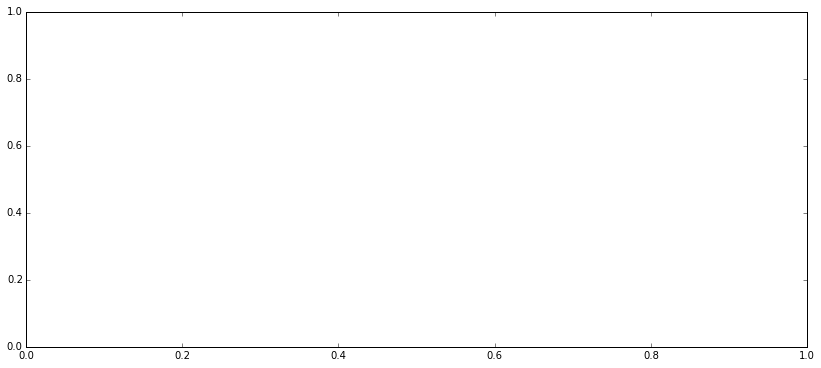

In [32]:
p = b.benchmark.plot_timeseries(u'109001', freq='y')

In [ ]:
p = b.benchmark.plot_regression(title="wunsat", freq='m', xlim=[0,None],ylim=[0,None])

In [ ]:
p = b.benchmark.plot_regression(title="wunsat", freq='y', yscale='log', xscale='log')

### 7. Statistics plotting
specify statistic type from "fobj", "nse", "rmse", "bias_relative", "pearsons_r" (default), "mean" and <br> frequency from 'd', 'm', 'y'

In [ ]:
p = b.benchmark.plot_box('pearsons_r', freq='d', ylim=[0,1])

In [ ]:
b.benchmark.models.AWRAMSI_v4_0_AWRAL.colour = 'm'
p = b.benchmark.plot_box('fobj', freq='m') #, ylim=[0,1])

In [ ]:
p = b.benchmark.plot_box('nse', freq='d')

In [ ]:
p = b.benchmark.plot_box('bias_relative', freq='m')

In [ ]:
p = b.benchmark.plot_box('pearsons_r', freq='m')

In [ ]:
p = b.benchmark.plot_box('fobj', freq='m')

In [ ]:
p = b.benchmark.plot_box('nse', freq='m') #, ylim=[0,1])

In [ ]:
p = b.benchmark.plot_box('bias_relative', freq='m', ylim=[-100,150])

In [ ]:
p = b.benchmark.plot_cdf('mean', freq='m', yscale='log')

In [ ]:
p = b.benchmark.plot_cdf('pearsons_r', freq='m', ylim=[0,1])

In [ ]:
p = b.benchmark.plot_cdf('bias_relative',freq='m', ylabel='Relative Bias (%)')

In [ ]:
p = b.benchmark.plot_cdf('nse',freq='m') #, ylim=[0,1])

In [ ]:
p = b.benchmark.plot_cdf('rmse',freq='m', yscale='log')

In [ ]:
p = b.benchmark.plot_cdf('fobj',freq='d') #, ylim=[0,1])

In [ ]:
p = b.benchmark.plot_cdf('fobj',freq='m') #, ylim=[0,1])